In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('development.csv')

In [3]:
columns_to_keep = ['Title', 'Publication Year', 'Publication Type', 'Source Title', 'Abstract',
                   'Fields of Study', 'Citing Patents Count', 'Citing Works Count']
df = df[columns_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10170 entries, 0 to 10169
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 10170 non-null  object 
 1   Publication Year      10141 non-null  float64
 2   Publication Type      10170 non-null  object 
 3   Source Title          10170 non-null  object 
 4   Abstract              7574 non-null   object 
 5   Fields of Study       8929 non-null   object 
 6   Citing Patents Count  10170 non-null  int64  
 7   Citing Works Count    10170 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 635.8+ KB


In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7187 entries, 1 to 10165
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 7187 non-null   object 
 1   Publication Year      7187 non-null   float64
 2   Publication Type      7187 non-null   object 
 3   Source Title          7187 non-null   object 
 4   Abstract              7187 non-null   object 
 5   Fields of Study       7187 non-null   object 
 6   Citing Patents Count  7187 non-null   int64  
 7   Citing Works Count    7187 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 505.3+ KB


In [5]:
df = df[df["Citing Patents Count"] == 0]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 1 to 10165
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 7159 non-null   object 
 1   Publication Year      7159 non-null   float64
 2   Publication Type      7159 non-null   object 
 3   Source Title          7159 non-null   object 
 4   Abstract              7159 non-null   object 
 5   Fields of Study       7159 non-null   object 
 6   Citing Patents Count  7159 non-null   int64  
 7   Citing Works Count    7159 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 503.4+ KB


In [7]:
df["Publication Year"] = df["Publication Year"].values.astype(int)
# Introducing temporal ordering
#df["Publication Year"] = pd.to_datetime(df["Publication Year"])
df = df.sort_values(by="Publication Year")

In [8]:
df = df.drop(df[(df['Abstract'] == 'n/') | (df['Abstract'] == "")].index)

In [9]:
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns',df.shape[1]+1)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [10]:
interesting_years = [1911, 1912, 1916, 1918, 1919, 1920,
       1921, 1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021]
interesting_years.sort()

In [11]:
len(interesting_years)

106

<AxesSubplot:xlabel='Publication Year'>

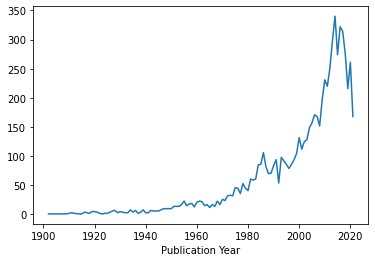

In [12]:
df.groupby('Publication Year').count()['Title'].plot()

<AxesSubplot:xlabel='Publication Year'>

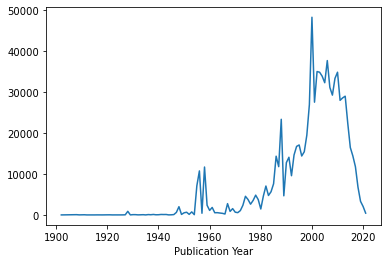

In [13]:
df.groupby('Publication Year').sum()['Citing Works Count'].plot()

In [14]:
import heapq
import re # regular expressions
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def preprocess(text):
    formatted_text = text.lower()
    tokens = []
    for token in nltk.word_tokenize(formatted_text):
        tokens.append(token)
    
    #print(tokens)
    tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
    formatted_text = ' '.join(element for element in tokens)
    return formatted_text

In [16]:
df["Abstract"] = df["Abstract"].apply(preprocess)

In [17]:
counts = df.groupby('Publication Year').count()['Title'].values
place_holder = [None]*(len(counts)+1)
place_holder[0] = 0
for i in range(1,len(counts)+1):
    place_holder[i] = place_holder[i-1] + counts[i-1]

In [18]:
len(counts)

112

In [19]:
len(df['Publication Year'].unique())

112

In [20]:
df = df.drop(df[(df['Abstract'] == 'n/') | (df['Abstract'] == "")].index)

In [21]:
df[(df['Abstract'] == 'n/') | (df['Abstract'] == "")].index

Int64Index([], dtype='int64')

In [22]:
df['Publication Year'].unique()

array([1902, 1908, 1909, 1911, 1912, 1914, 1915, 1916, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021])

In [23]:
df['Publication Year'].value_counts() 

2014    340
2016    322
2017    314
2013    298
2018    276
2015    274
2020    261
2012    251
2010    231
2011    220
2019    216
2009    197
2006    171
2021    168
2007    168
2005    157
2008    152
2004    149
2000    132
2003    128
2002    125
2001    112
1986    106
1999    105
1993     98
1991     94
1998     94
1994     92
1997     86
1995     86
1985     86
1984     85
1990     84
1987     82
1996     79
1989     71
1988     70
1983     61
1981     61
1982     59
1992     54
1978     53
1975     46
1979     45
1976     45
1980     41
1977     36
1973     33
1974     32
1972     32
1970     26
1971     24
1961     23
1955     23
1968     23
1962     22
1960     21
1958     19
1957     18
1954     17
1964     17
1969     17
1966     17
1956     15
1963     15
1967     14
1953     14
1952     14
1951     14
1959     13
1965     12
1949     10
1948     10
1947     10
1950     10
1946      8
1939      8
1934      8
1928      7
1936      7
1942      7
1945      6
1944      6
1943

In [24]:
interesting_years = [1911, 1912, 1916, 1918, 1919, 1920,
       1921, 1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021]
interesting_years.sort()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy.sparse as sparse
import networkx as nx

In [26]:
percentage_high = 0.95
percentage_low = 0.015 # 1% or 1.5% is probably better

In [27]:
# Getting bigrams from abstracts
vectorizer_abstracts = CountVectorizer(ngram_range =(2, 2), max_df = percentage_high, min_df = percentage_low)
X_titles = vectorizer_abstracts.fit_transform(df["Abstract"]) 
features_abstracts = (vectorizer_abstracts.get_feature_names())
#print("\n\nX_titles : \n", X_titles.toarray())

In [28]:
# Applying TFIDF to titles
#You can still get n-grams here
vectorizer_abstracts = TfidfVectorizer(ngram_range = (2, 2), max_df = percentage_high, min_df = percentage_low)
abstracts_tfidf = vectorizer_abstracts.fit_transform(df["Abstract"])
scores = (abstracts_tfidf.toarray())
#print("\n\nScores : \n", scores)



Most relevant bi-grams 
                      term        rank
0          abstract paper  527.353487
8    developing countries  314.928564
9    economic development  275.518512
47          united states  259.546310
10        economic growth  259.063192
25               long run  224.129141
19          human capital  213.253334
31         paper examines  202.079082
13          exchange rate  189.622869
36             per capita  166.776092
23           labor market  164.434405
43        results suggest  154.759506
48             using data  142.439098
14  financial development  141.604895
17    general equilibrium  134.362752
26              long term  131.139607
11     empirical evidence  130.470170
28             panel data  126.152451
15          find evidence  121.887574
42           results show  110.713324
27        monetary policy  109.101573
44              short run  107.150224
33         paper presents  105.828978
41       results indicate  105.337418
40   research developme

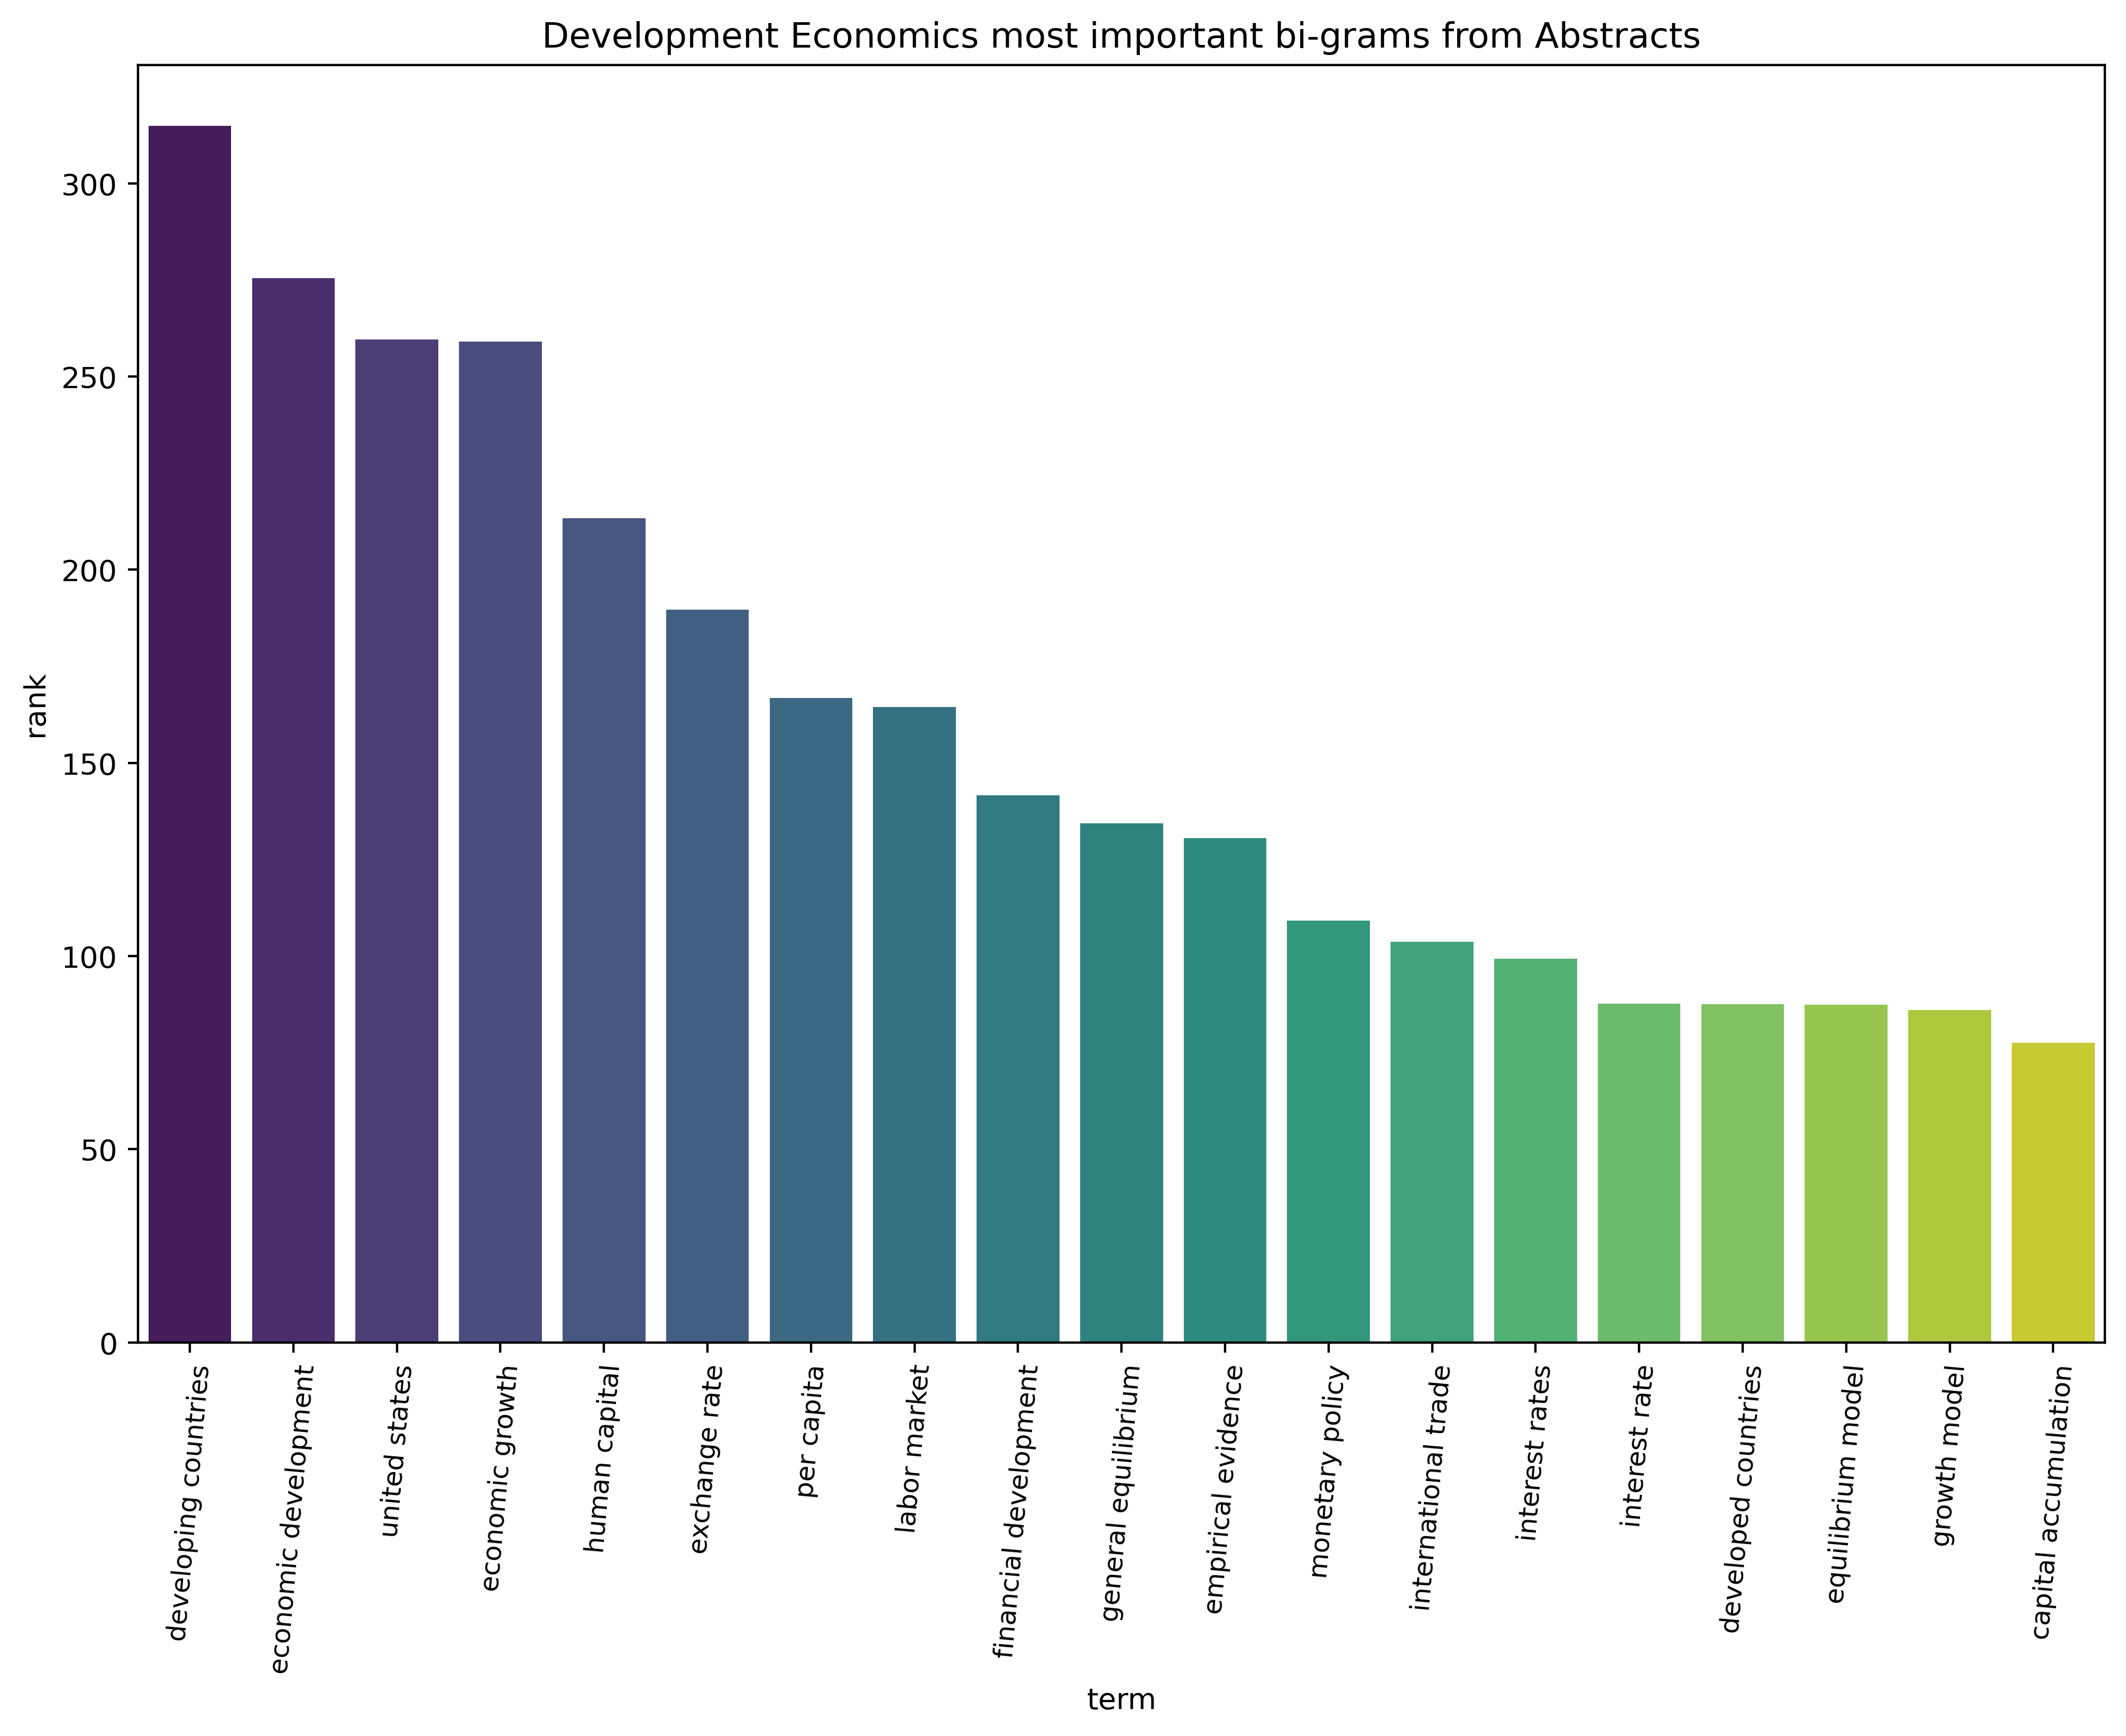

In [30]:
 # Getting top ranking features
sums = abstracts_tfidf.sum(axis = 0)
data1 = []
for col, term in enumerate(features_abstracts):
    data1.append((term, sums[0, col]))
ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
words = (ranking.sort_values('rank', ascending = False))
print("\n\nMost relevant bi-grams \n", words.head(50))
plt.figure(figsize=(12,8), dpi=400)
sns.barplot(x="term", y="rank", data=ranking.loc[ranking['term'].isin(['capital accumulation',
       'developed countries', 'developing countries',
       'economic development', 'economic growth', 'empirical evidence',
       'equilibrium model', 'exchange rate', 'financial development',
       'general equilibrium',
       'growth model', 'human capital', 'interest rate', 'interest rates',
       'international trade', 'labor market','monetary policy', 'per capita',
       'united states'])].sort_values('rank', ascending = False), palette = 'viridis')
plt.title("Development Economics most important bi-grams from Abstracts")
plt.xticks(fontsize=9, rotation=85);
plt.yticks(fontsize=10);

In [30]:
ranking['term'].unique()

array(['abstract paper', 'abstract study', 'across countries',
       'also find', 'capital accumulation', 'cross country', 'data set',
       'developed countries', 'developing countries',
       'economic development', 'economic growth', 'empirical evidence',
       'equilibrium model', 'exchange rate', 'financial development',
       'find evidence', 'firm level', 'general equilibrium',
       'growth model', 'human capital', 'interest rate', 'interest rates',
       'international trade', 'labor market', 'level data', 'long run',
       'long term', 'monetary policy', 'panel data', 'paper analyzes',
       'paper develops', 'paper examines', 'paper investigates',
       'paper presents', 'paper studies', 'paper uses', 'per capita',
       'provide evidence', 'recent developments', 'recent years',
       'research development', 'results indicate', 'results show',
       'results suggest', 'short run', 'short term', 'time series',
       'united states', 'using data'], dtype=object)

In [31]:
ranking.loc[ranking['term'].isin(['capital accumulation',
       'developed countries', 'developing countries',
       'economic development', 'economic growth', 'empirical evidence',
       'equilibrium model', 'exchange rate', 'financial development',
       'general equilibrium',
       'growth model', 'human capital', 'interest rate', 'interest rates',
       'international trade', 'labor market','monetary policy', 'per capita',
       'united states'])].sort_values('rank', ascending = False)

term        rank
8    developing countries  314.928564
9    economic development  275.518512
47          united states  259.546310
10        economic growth  259.063192
19          human capital  213.253334
13          exchange rate  189.622869
36             per capita  166.776092
23           labor market  164.434405
14  financial development  141.604895
17    general equilibrium  134.362752
11     empirical evidence  130.470170
27        monetary policy  109.101573
22    international trade  103.681453
21         interest rates   99.330486
20          interest rate   87.695218
7     developed countries   87.472251
12      equilibrium model   87.373153
18           growth model   86.020334
4    capital accumulation   77.611525

In [32]:
#tf_idf_abstracts = pd.DataFrame.sparse.from_spmatrix(abstracts_tfidf, columns=vectorizer_abstracts.get_feature_names())
tf_idf_abstracts = pd.DataFrame(data=abstracts_tfidf.toarray(),columns=vectorizer_abstracts.get_feature_names())
tf_idf_abstracts.shape

(7140, 49)

In [33]:
tf_idf_abstracts.columns

Index(['abstract paper', 'abstract study', 'across countries', 'also find', 'capital accumulation', 'cross country', 'data set', 'developed countries', 'developing countries', 'economic development', 'economic growth', 'empirical evidence', 'equilibrium model', 'exchange rate', 'financial development', 'find evidence', 'firm level', 'general equilibrium', 'growth model', 'human capital', 'interest rate', 'interest rates', 'international trade', 'labor market', 'level data', 'long run', 'long term', 'monetary policy', 'panel data', 'paper analyzes', 'paper develops', 'paper examines', 'paper investigates', 'paper presents', 'paper studies', 'paper uses', 'per capita', 'provide evidence', 'recent developments', 'recent years', 'research development', 'results indicate', 'results show', 'results suggest', 'short run', 'short term', 'time series', 'united states', 'using data'], dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(tf_idf_abstracts)

In [35]:
from sklearn.decomposition import PCA

In [36]:
explained_variance = []

for n in range(1,tf_idf_abstracts.shape[1]+1):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

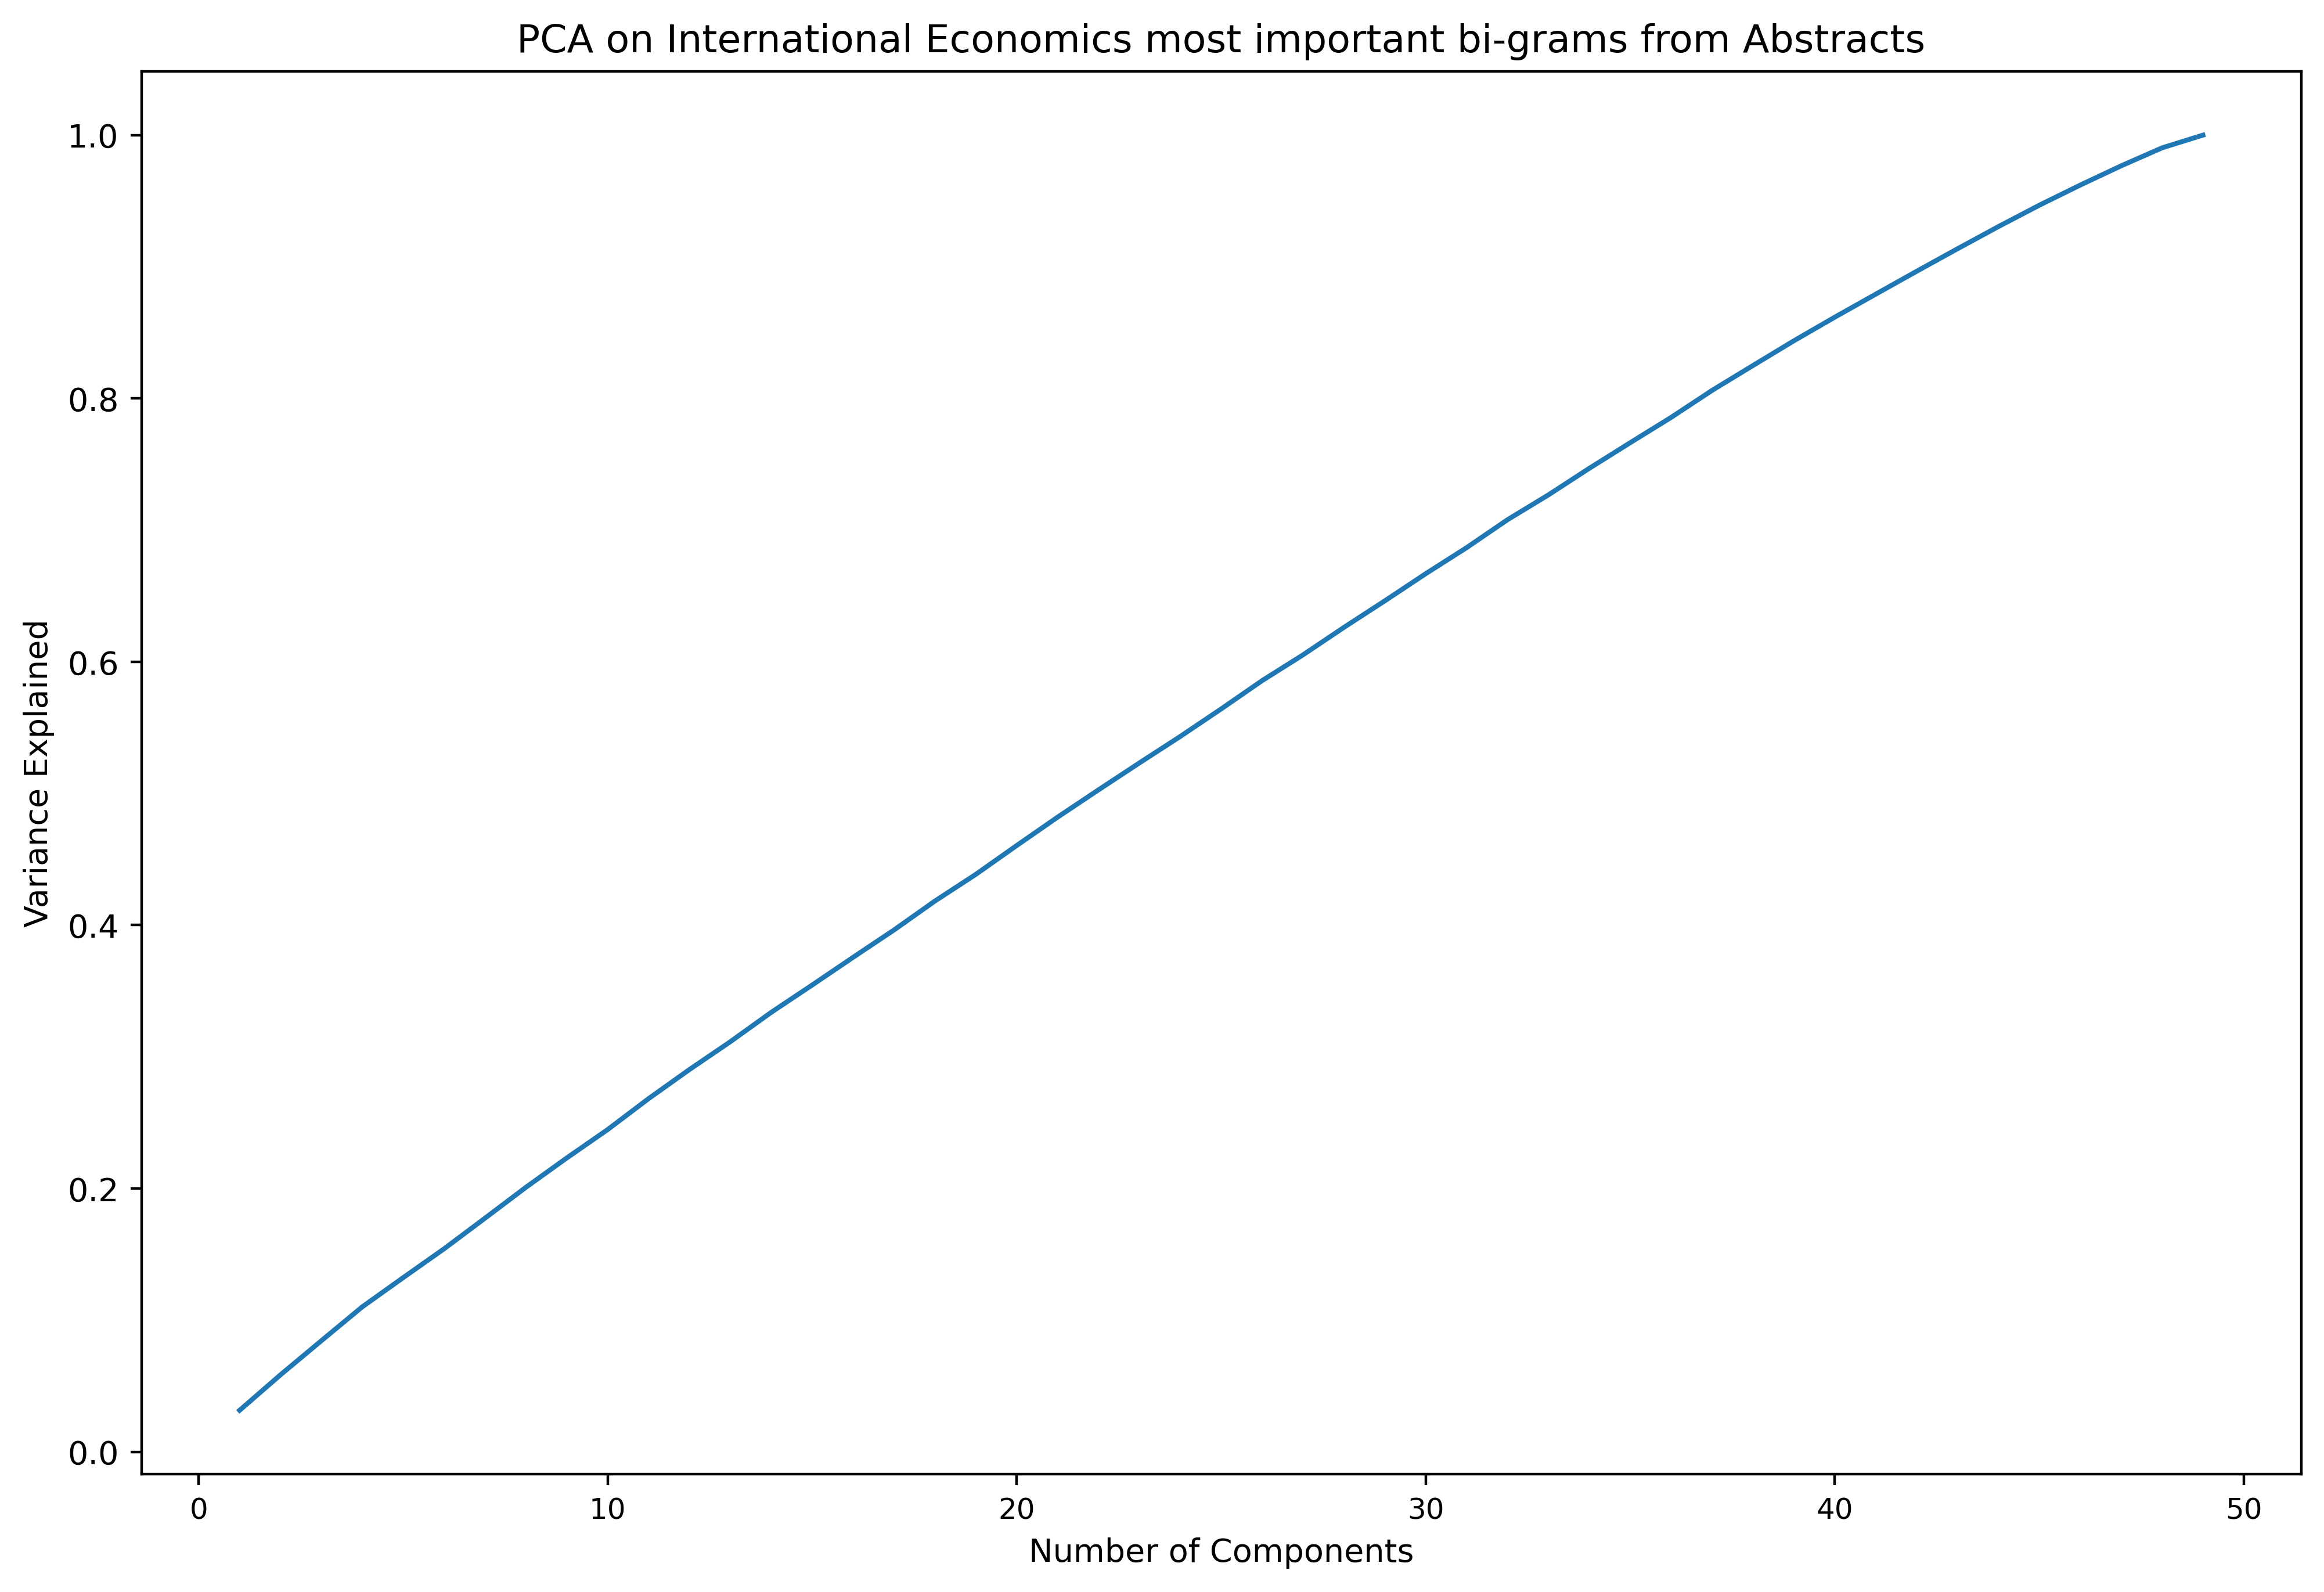

In [37]:
plt.figure(figsize=(12,8), dpi=400)
plt.plot(range(1,tf_idf_abstracts.shape[1]+1),explained_variance)
plt.title("PCA on International Economics most important bi-grams from Abstracts")
plt.xticks(fontsize=9);
plt.yticks(fontsize=10);
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [38]:
interesting_columns = ['capital accumulation','developed countries', 'developing countries', 'economic development',
                       'economic growth', 'equilibrium model', 'exchange rate','financial development','general equilibrium', 
                       'growth model','human capital', 'interest rates', 'international trade', 'labor market','monetary policy', 
                       'per capita', 'provide evidence', 'recent developments', 'recent years','united states']

In [39]:
tf_idf_abstracts = tf_idf_abstracts[interesting_columns]
tf_idf_abstracts.shape

(7140, 20)

{'1': Text(-0.2180190305249449, -0.001290207878824352, '1'),
 '2': Text(0.1272934077499818, -0.14572869790228418, '2'),
 '3': Text(1.0, -0.5310331873248499, '3'),
 '4': Text(-0.0585298889868843, 0.09667986997531319, '4'),
 '5': Text(0.3615376069326659, -0.12570804596101318, '5'),
 '6': Text(0.06458289439193687, 0.23433713911550147, '6'),
 '7': Text(-0.3364099449214544, 0.1297467480684713, '7'),
 '8': Text(-0.42591155046531426, -0.1983435248569403, '8'),
 '9': Text(-0.6189063611251222, 0.5529422683525449, '9'),
 '10': Text(0.12936938824879377, 0.5254172554352191, '10'),
 '11': Text(0.2585591473460376, -0.21773035833311835, '11'),
 '12': Text(-0.25194660671534885, -0.018466613329327017, '12'),
 '13': Text(-0.14279881613539813, -0.4193292656957955, '13'),
 '14': Text(-0.31505528133524857, -0.3088031684600589, '14'),
 '15': Text(-0.1567113301867234, -0.1481767901430127, '15'),
 '16': Text(0.14992127534131097, -0.29970932060002925, '16'),
 '17': Text(0.23681069551394363, 0.07409419554854225

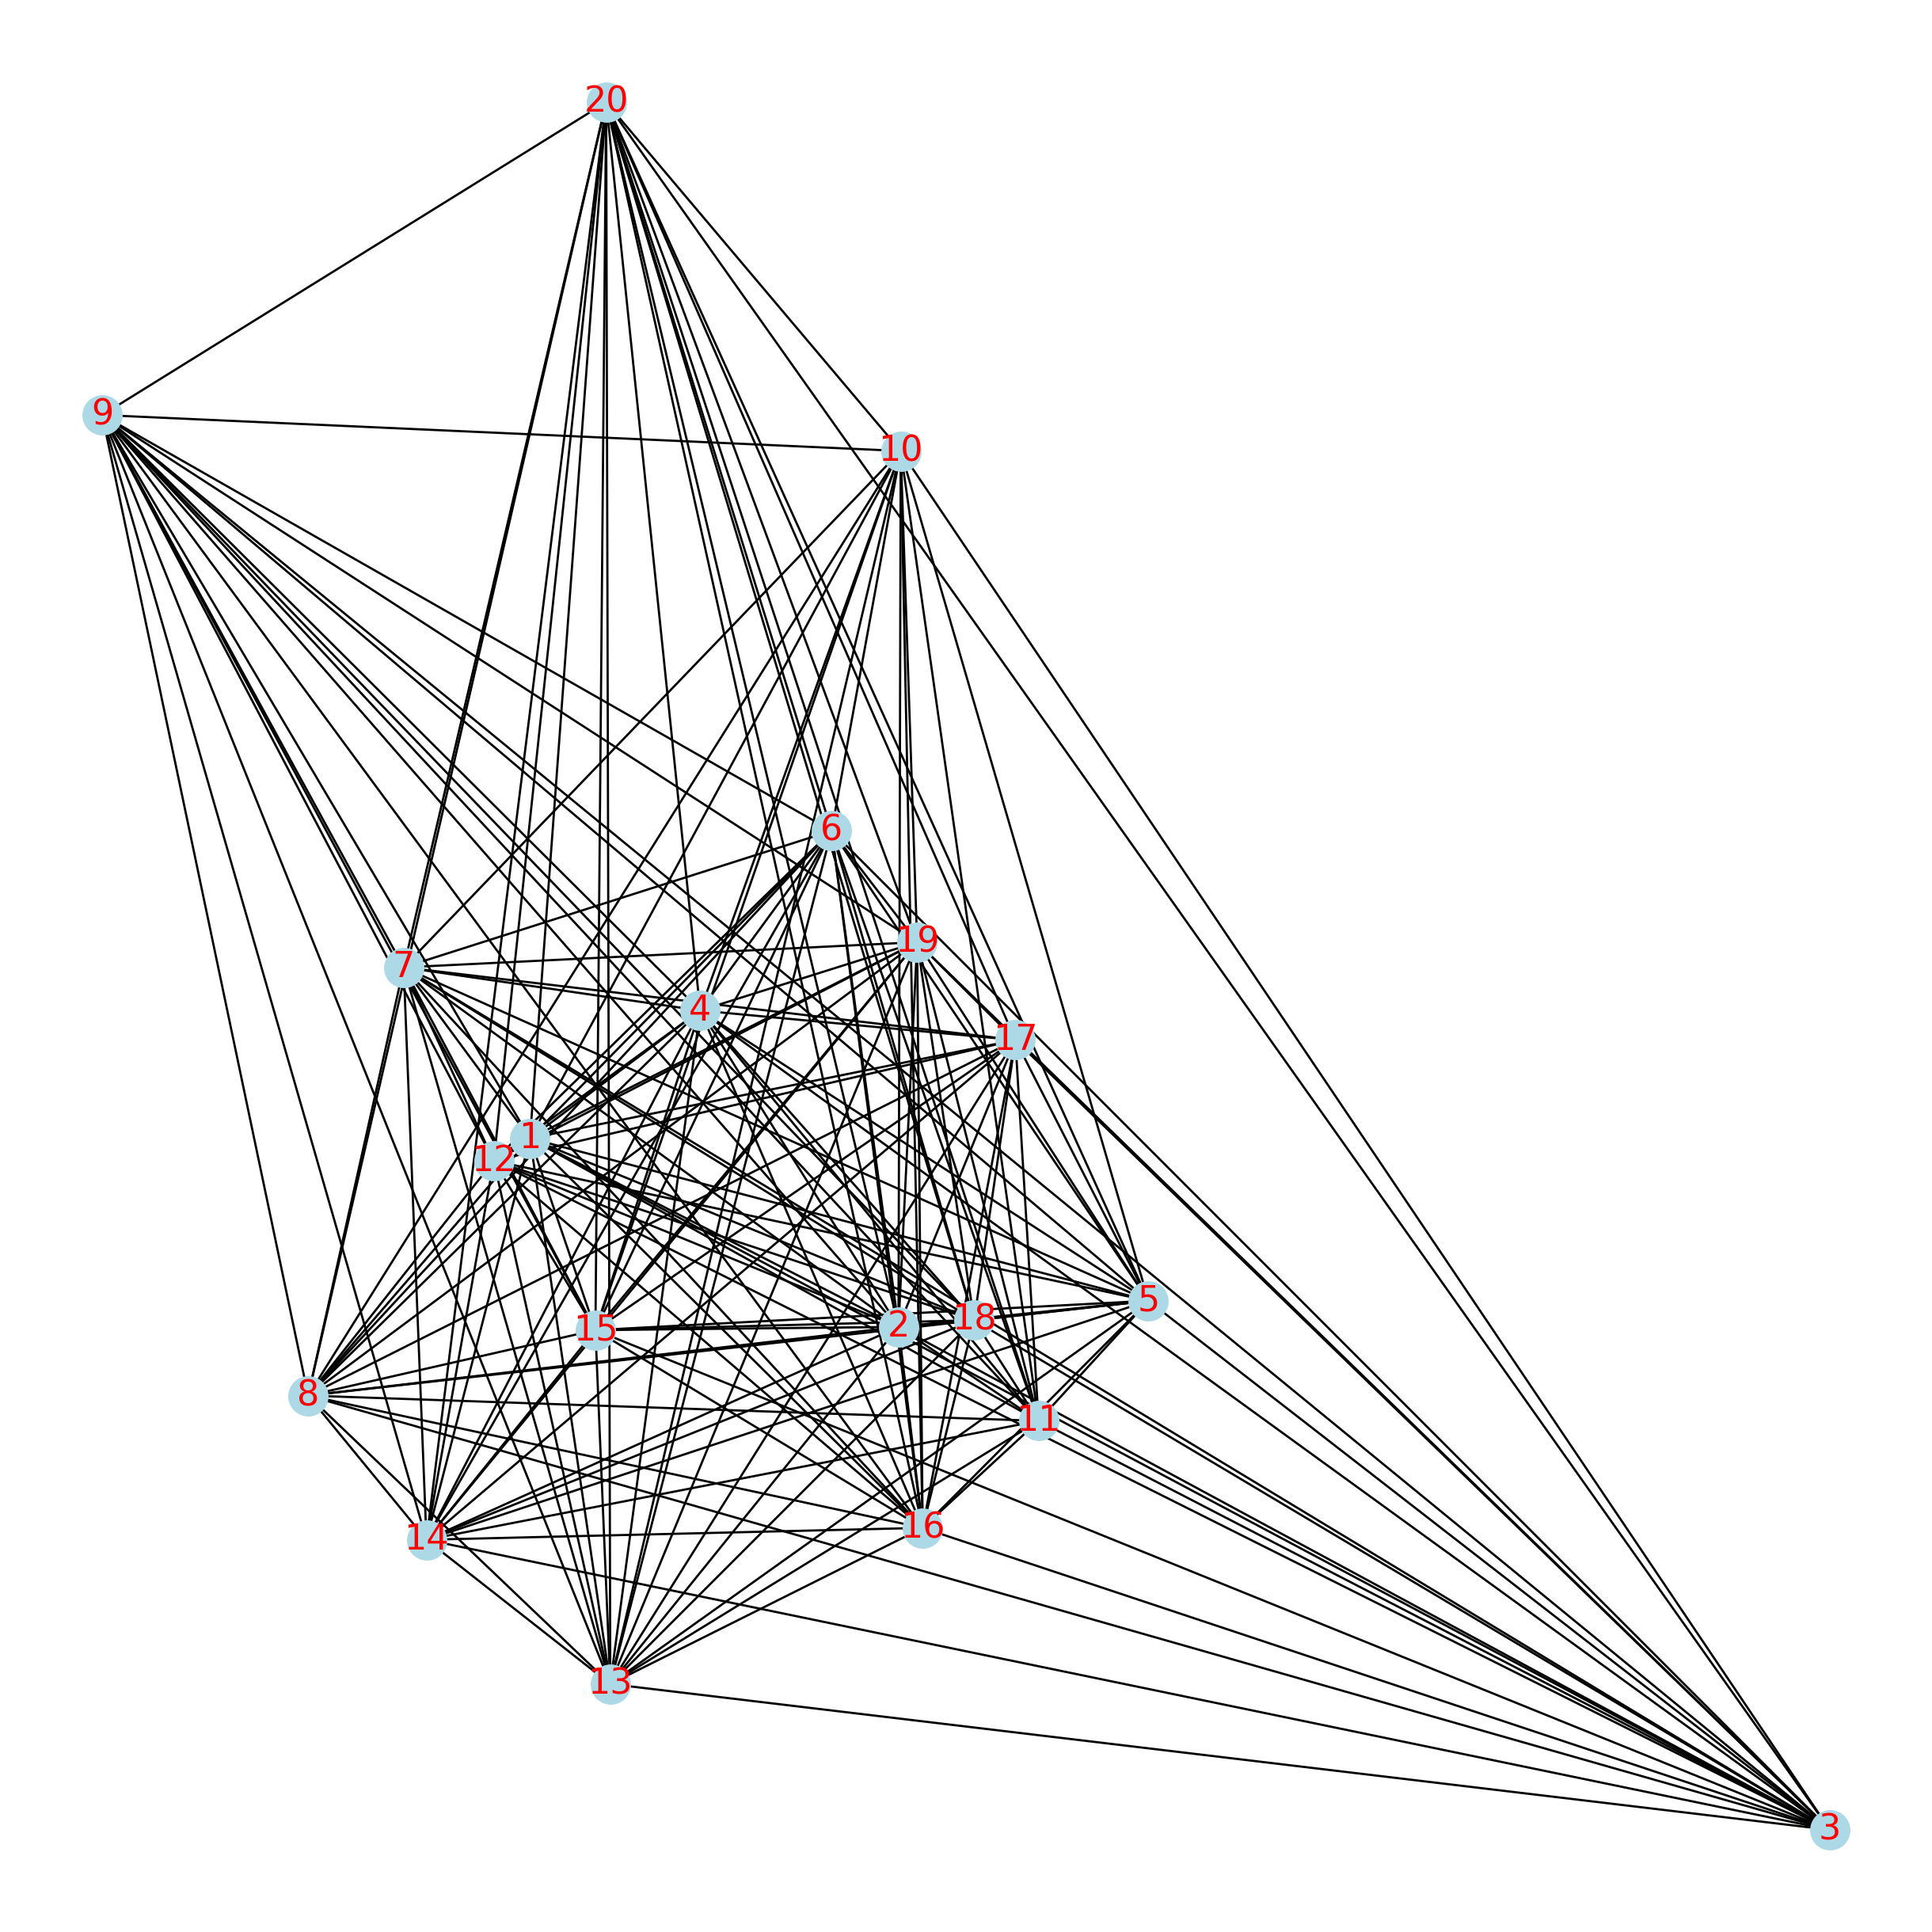

In [40]:
tf_idf_abstracts_2 = tf_idf_abstracts.rename({'capital accumulation':'1','developed countries':'2', 'developing countries':'3',
                                              'economic development':'4','economic growth':'5', 'equilibrium model':'6', 
                                              'exchange rate':'7','financial development':'8','general equilibrium':'9', 
                       'growth model':'10','human capital':'11', 'interest rates':'12', 'international trade':'13', 
                       'labor market':'14','monetary policy':'15','per capita':'16', 'provide evidence':'17', 
                                              'recent developments':'18', 'recent years':'19','united states':'20'}, axis='columns')
meta_matrix = tf_idf_abstracts_2.transpose().dot(tf_idf_abstracts_2)
G=nx.from_pandas_adjacency(meta_matrix)
plt.figure(figsize=(12,12), dpi=200)
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_color='lightblue')
#nx.draw_networkx_nodes(G, pos=nx.kamada_kawai_layout(G), node_color="tab:red")
nx.draw_networkx_labels(G, pos=nx.kamada_kawai_layout(G), font_size=16, font_color="red")

In [41]:
centrality_time_series = []
count = 0 

# andare di anno in anno
for i in range(0, len(place_holder)-1):
    if(place_holder[i+1]-place_holder[i] > 1):
        count += 1
        meta_matrix = tf_idf_abstracts.iloc[place_holder[i]:place_holder[i+1]+1,:].transpose().dot(tf_idf_abstracts.iloc[place_holder[i]:place_holder[i+1]+1,:])
        G=nx.from_pandas_adjacency(meta_matrix)
        centrality_time_series = centrality_time_series + list(nx.degree_centrality(G).values())
        #clustering_time_series = clustering_time_series + list(nx.clustering(G).values())

In [42]:
centrality_time_series = np.reshape(centrality_time_series,(count,tf_idf_abstracts.shape[1]))
df_centrality_time_series = pd.DataFrame(data=centrality_time_series, columns=interesting_columns)
df_centrality_time_series['year'] = ""
df_centrality_time_series['year'] = interesting_years
#df_centrality_time_series.to_csv('centrality_time_series_abstracts_bigrams_international.csv')

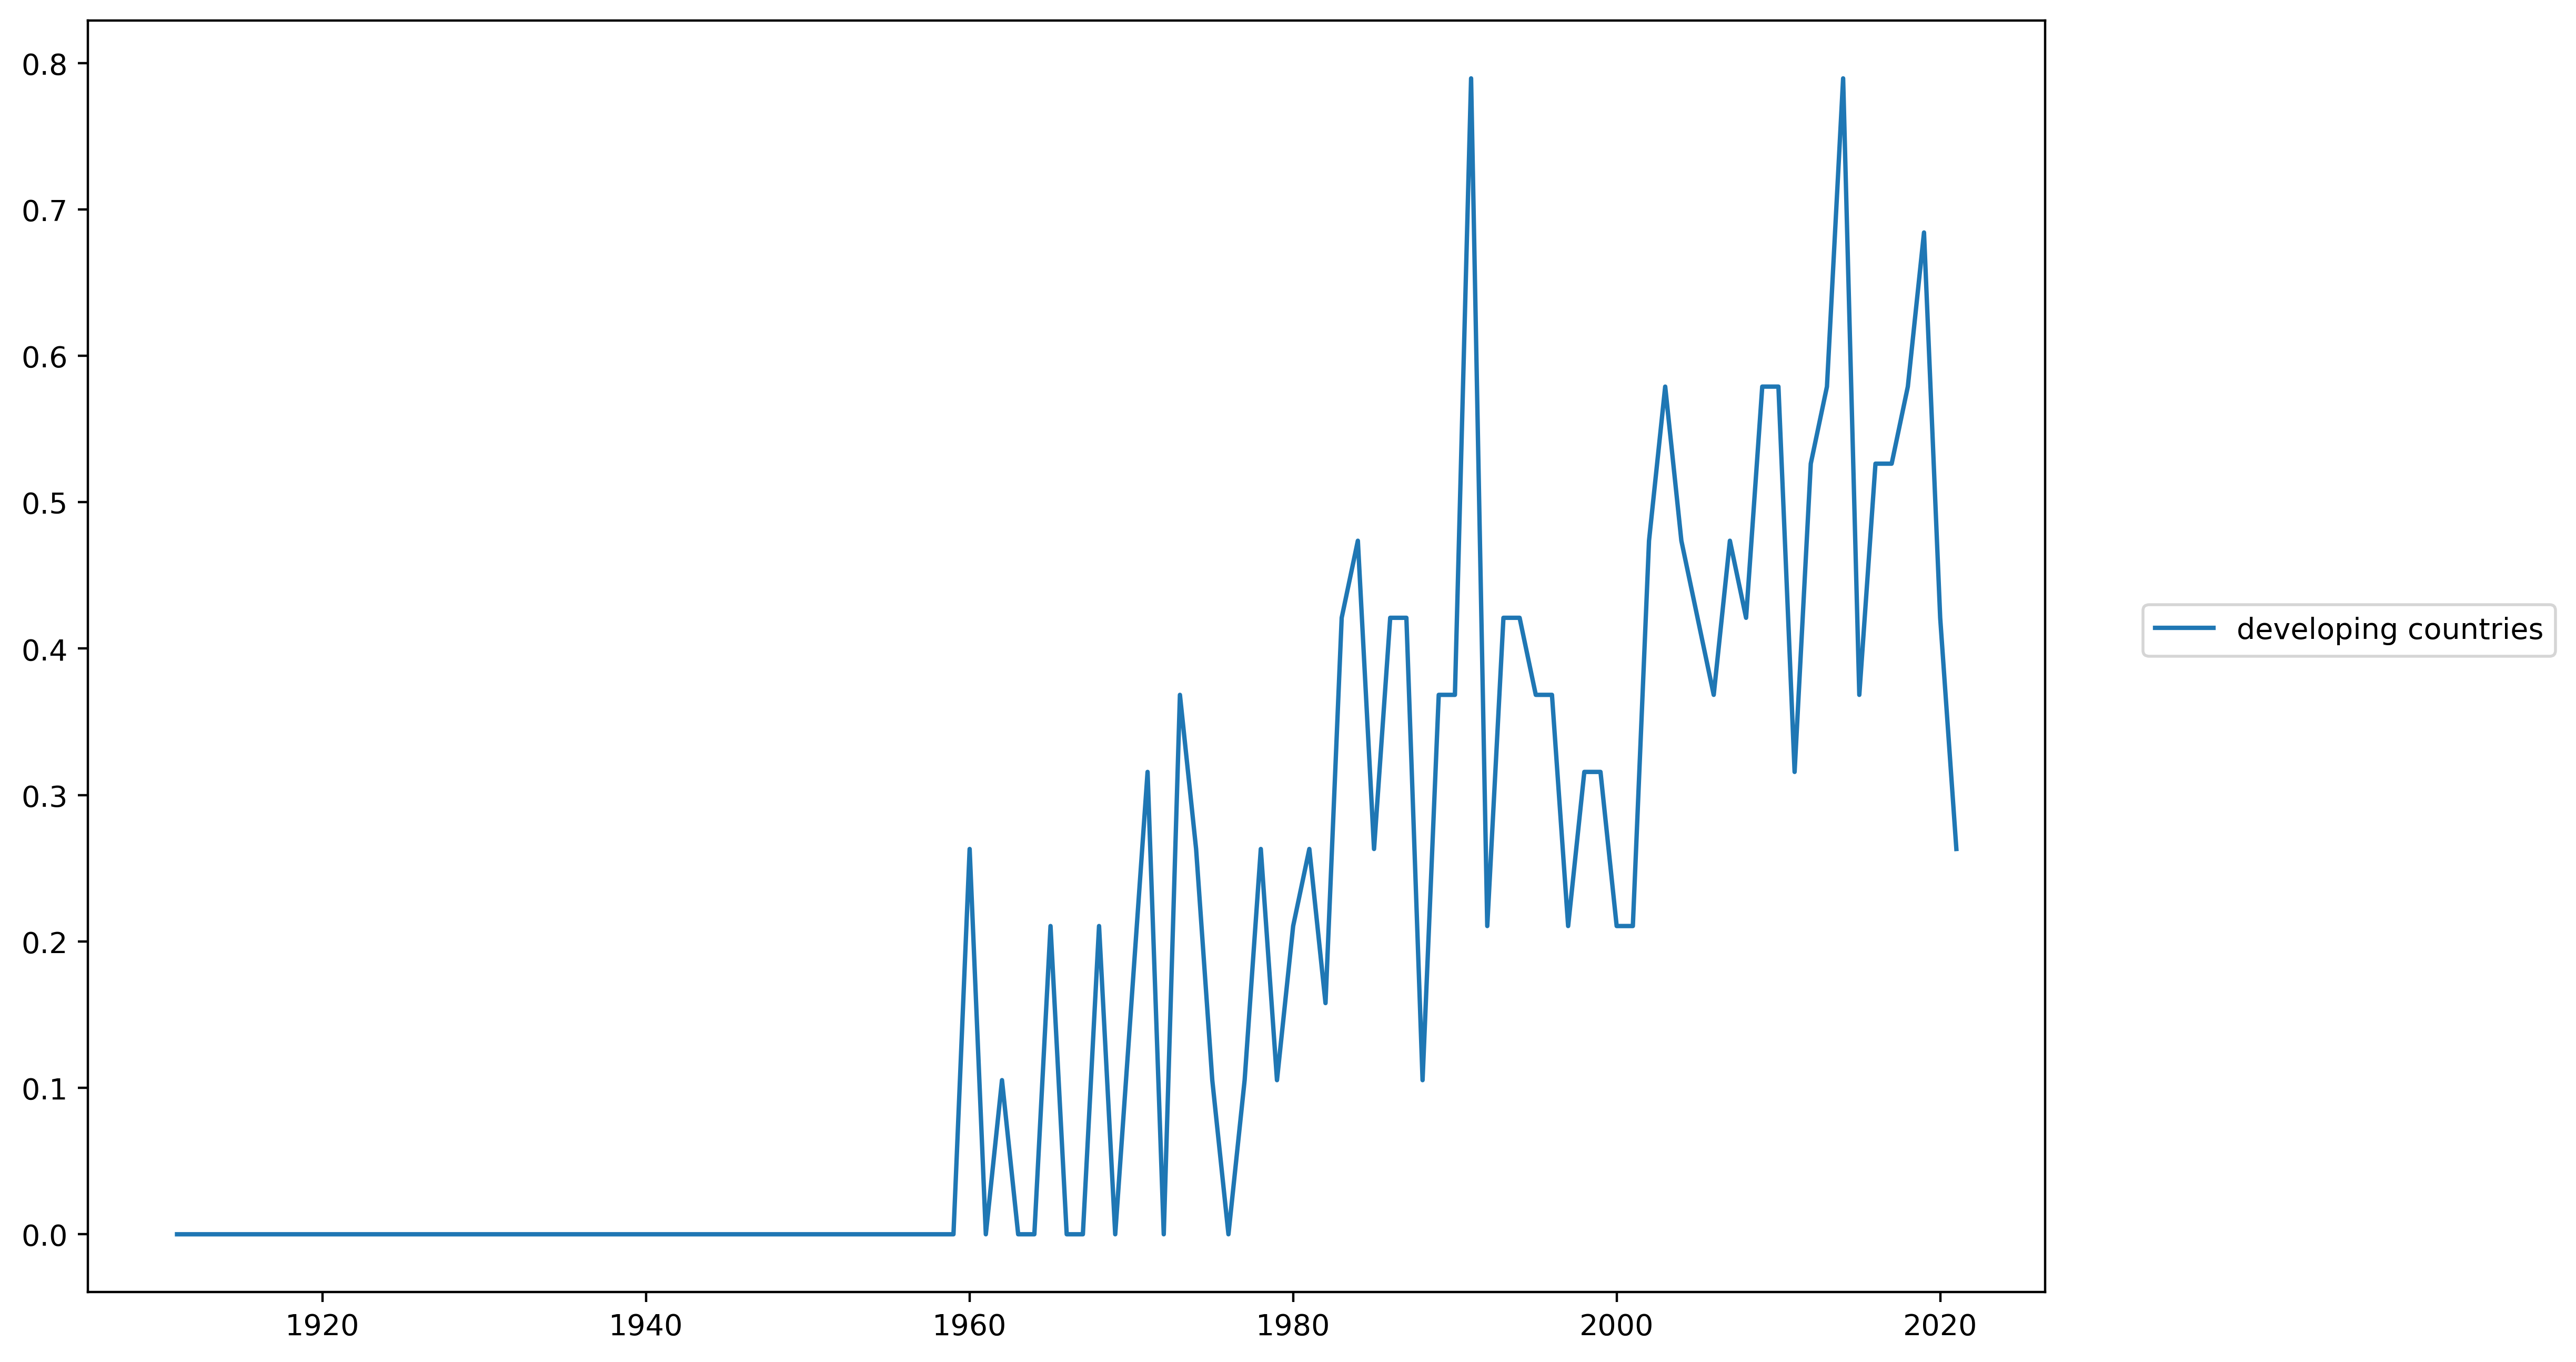

In [45]:
plt.figure(figsize=(12,8), dpi=400)
plt.plot(df_centrality_time_series['year'],df_centrality_time_series['developing countries'], label = "developing countries")
plt.legend(loc=(1.05,0.5))

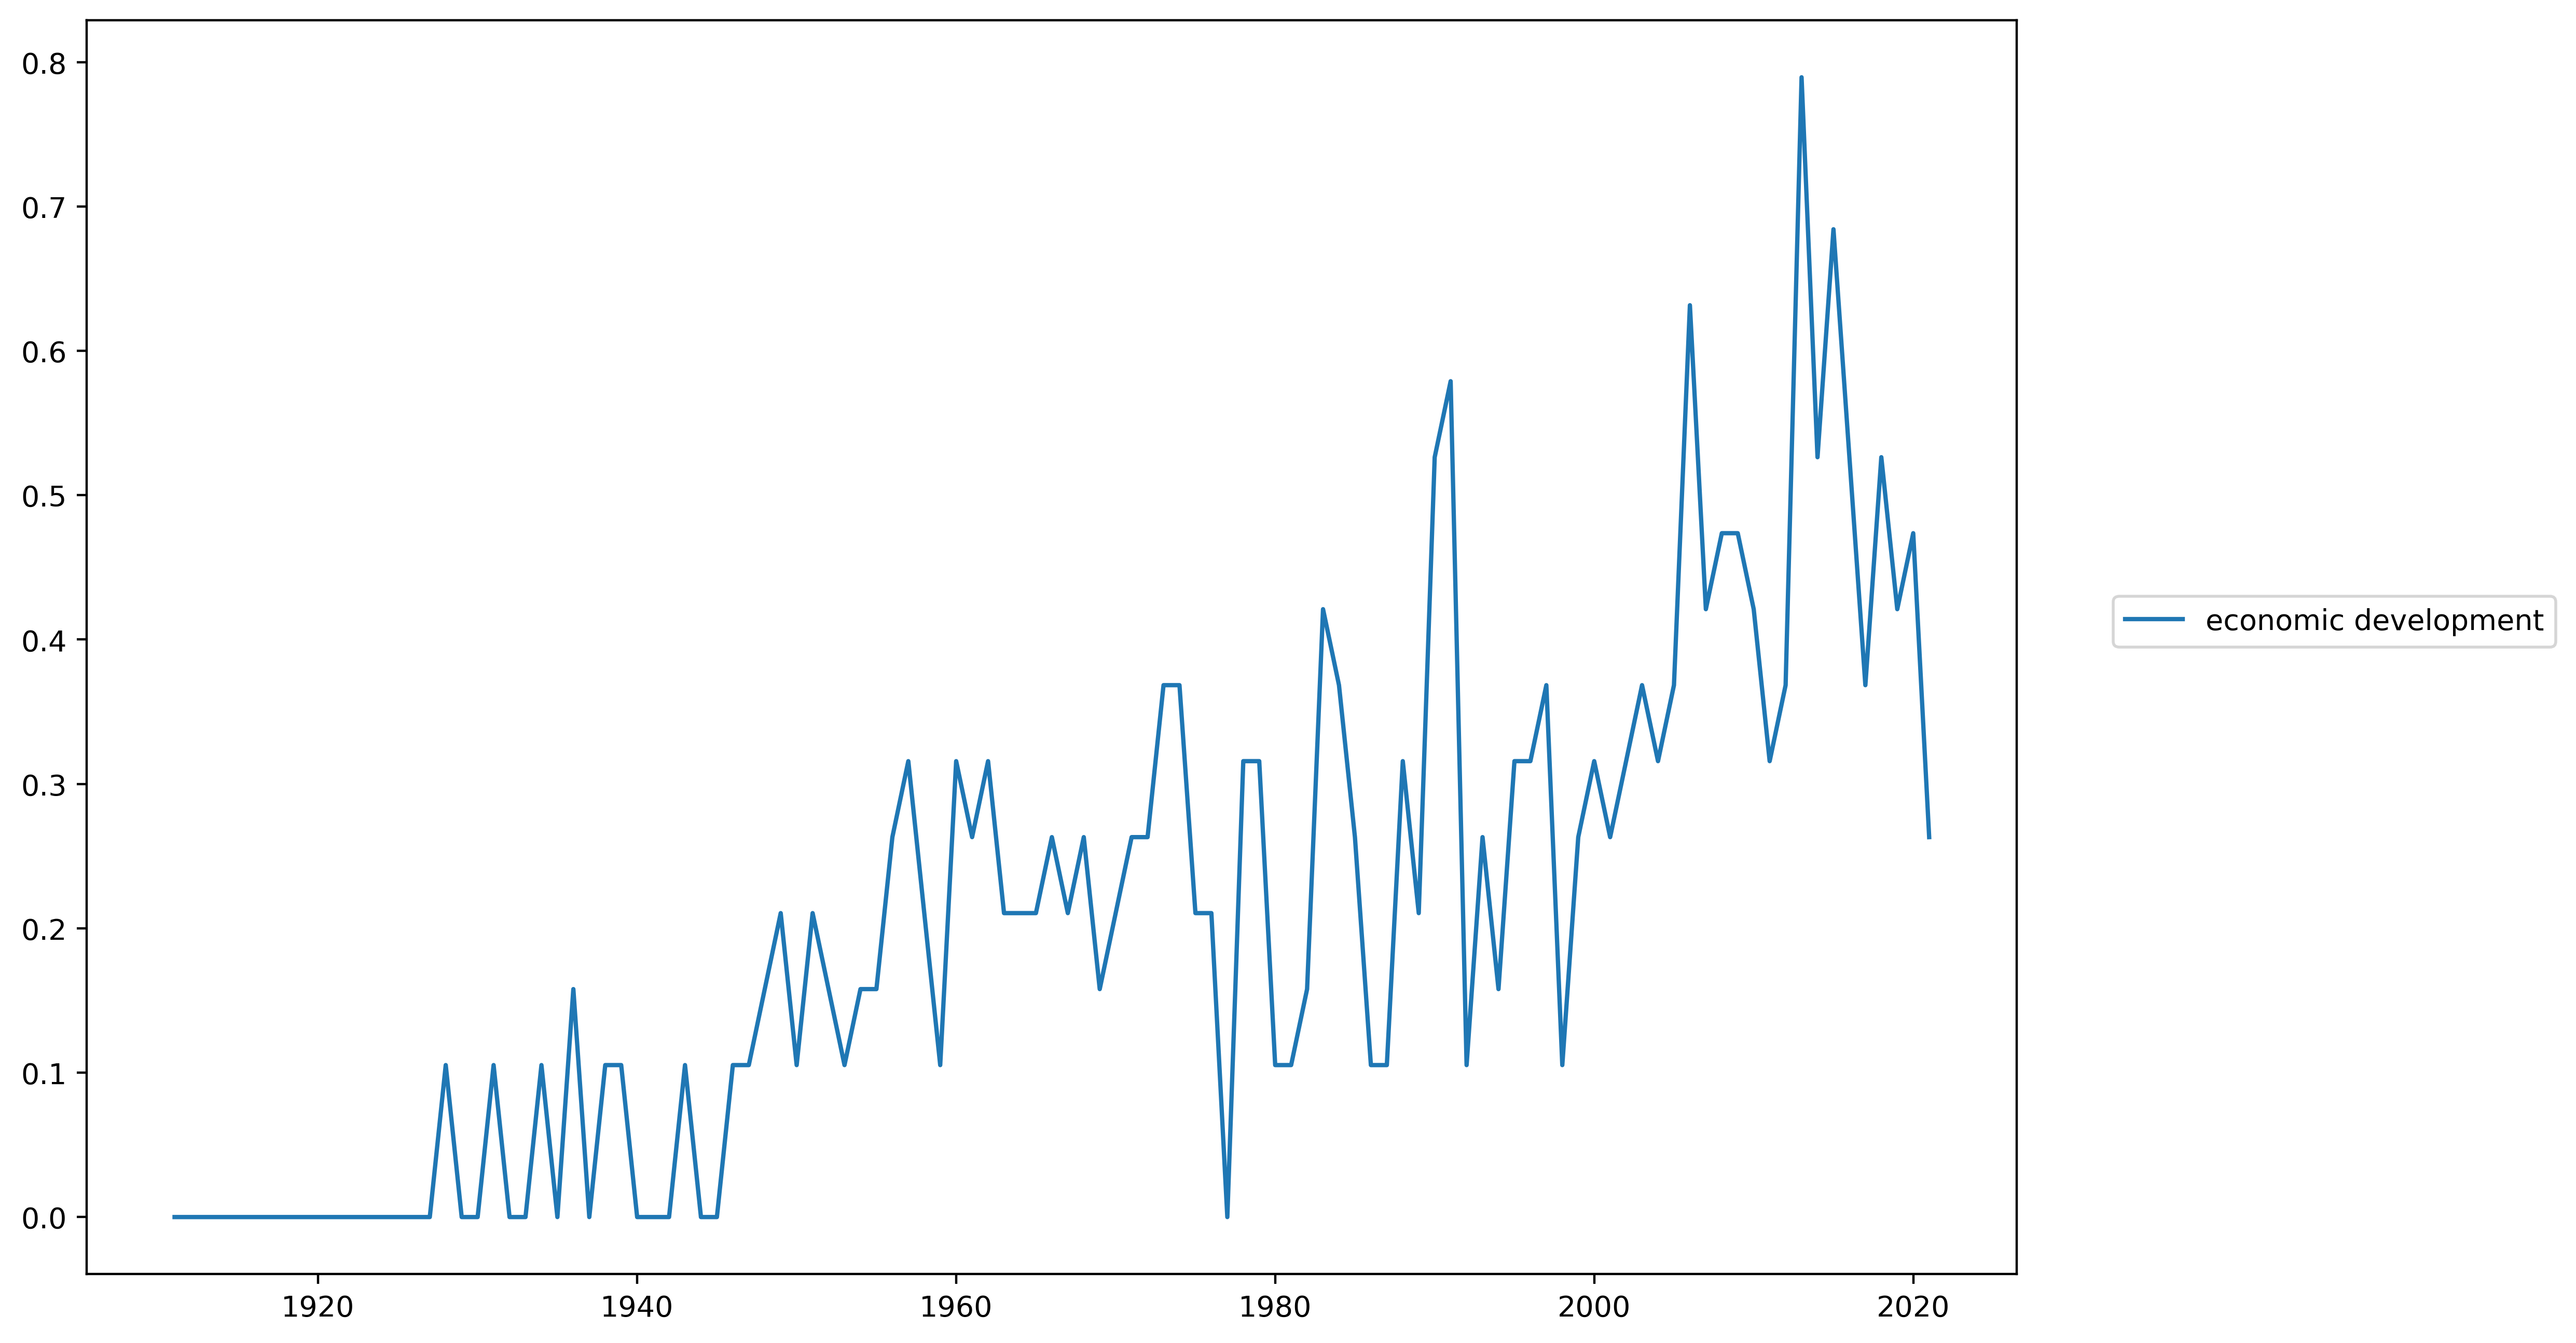

In [46]:
plt.figure(figsize=(12,8), dpi=400)
plt.plot(df_centrality_time_series['year'],df_centrality_time_series['economic development'], label = "economic development")
plt.legend(loc=(1.05,0.5))

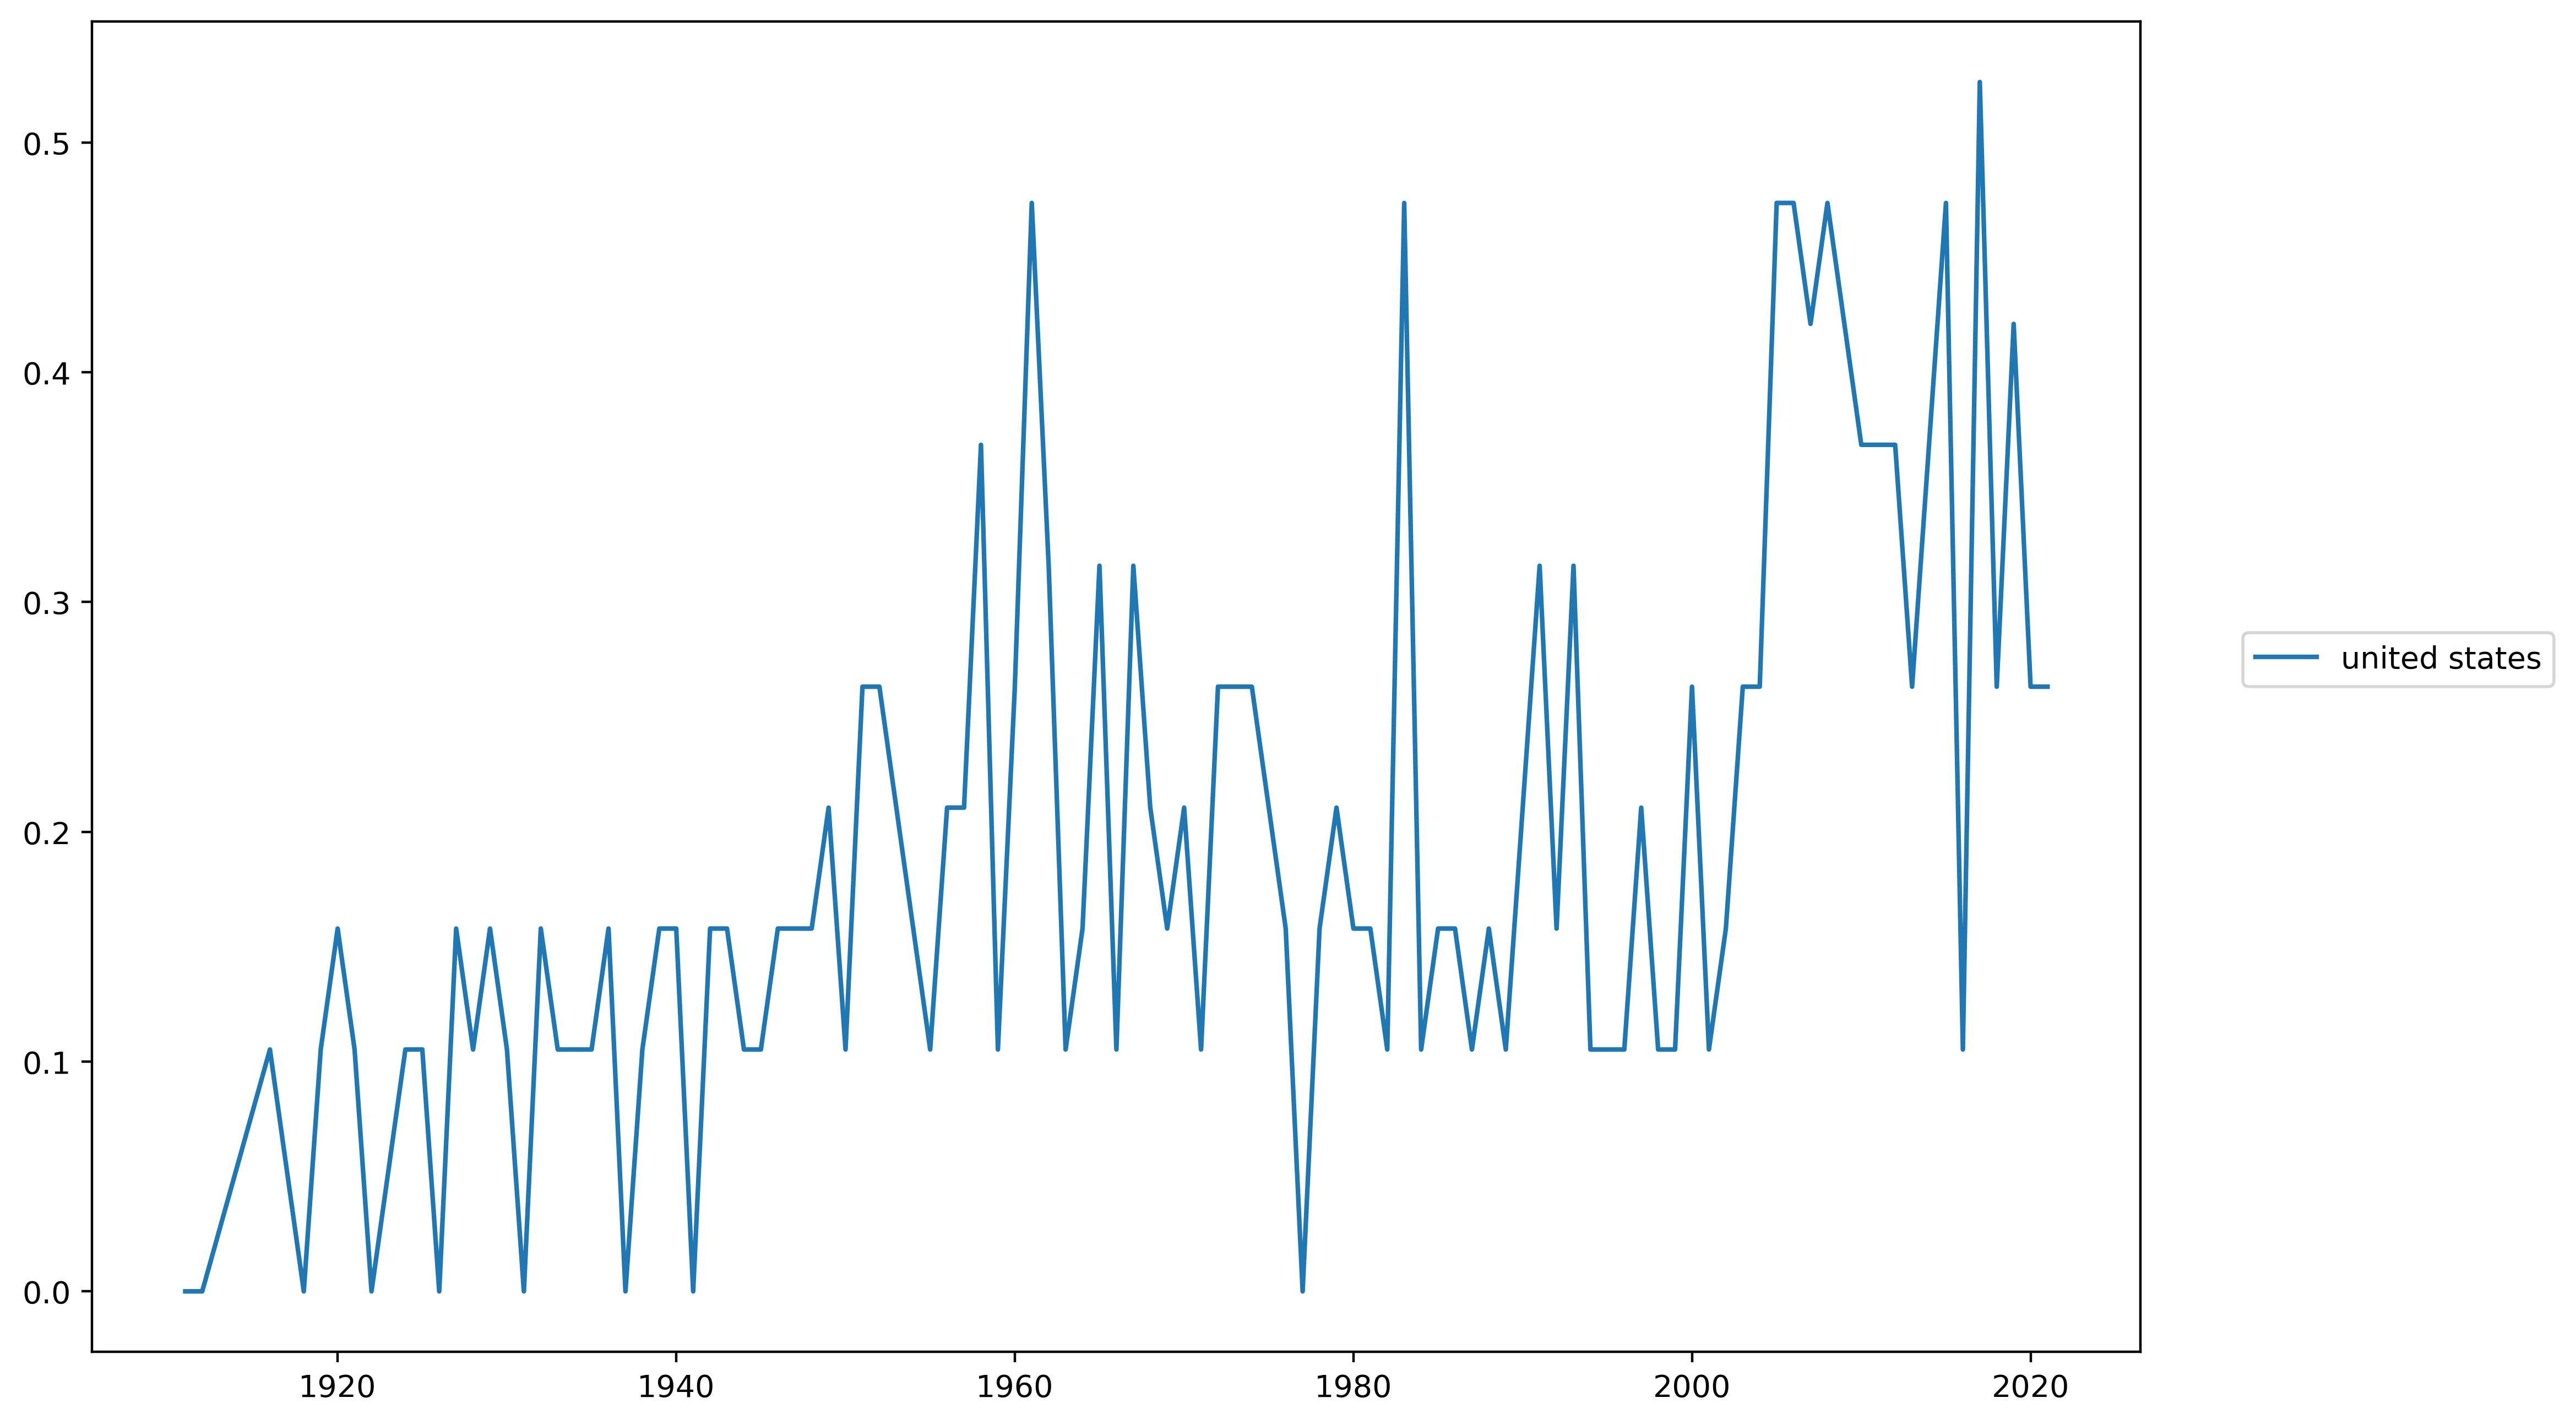

In [47]:
plt.figure(figsize=(12,8), dpi=400)
plt.plot(df_centrality_time_series['year'],df_centrality_time_series['united states'], label = "united states")
plt.legend(loc=(1.05,0.5))

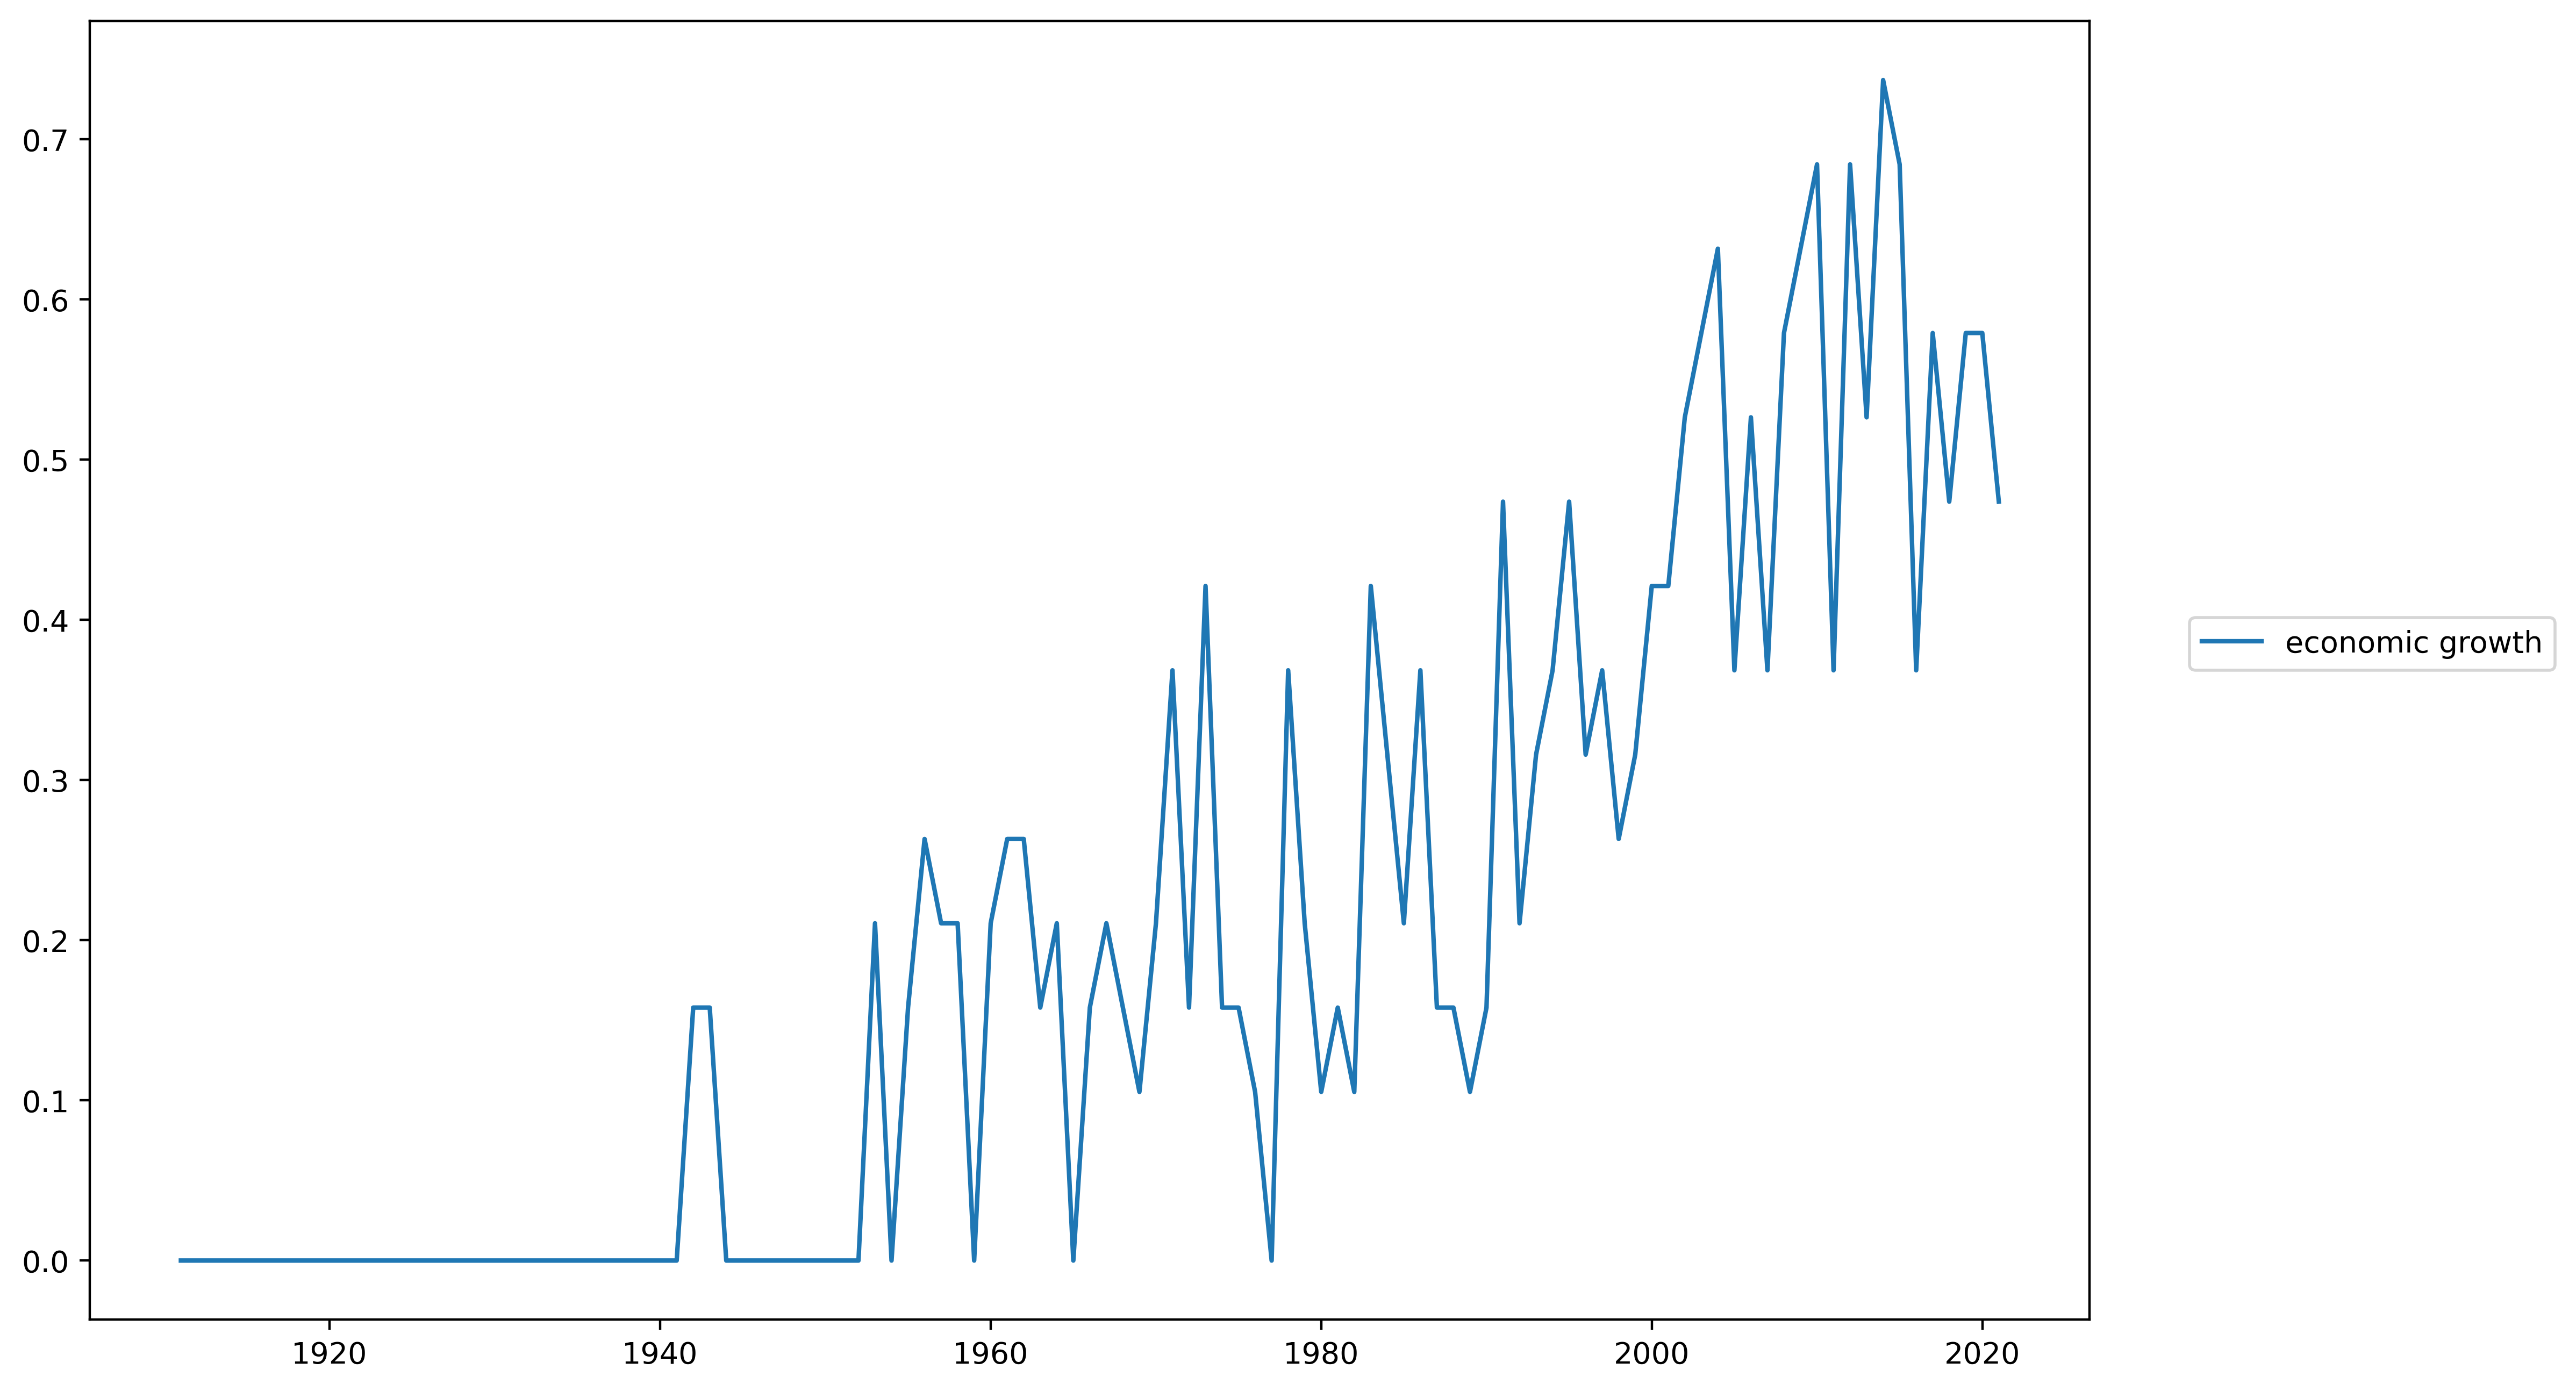

In [48]:
plt.figure(figsize=(12,8), dpi=400)
plt.plot(df_centrality_time_series['year'],df_centrality_time_series['economic growth'], label = "economic growth")
plt.legend(loc=(1.05,0.5))

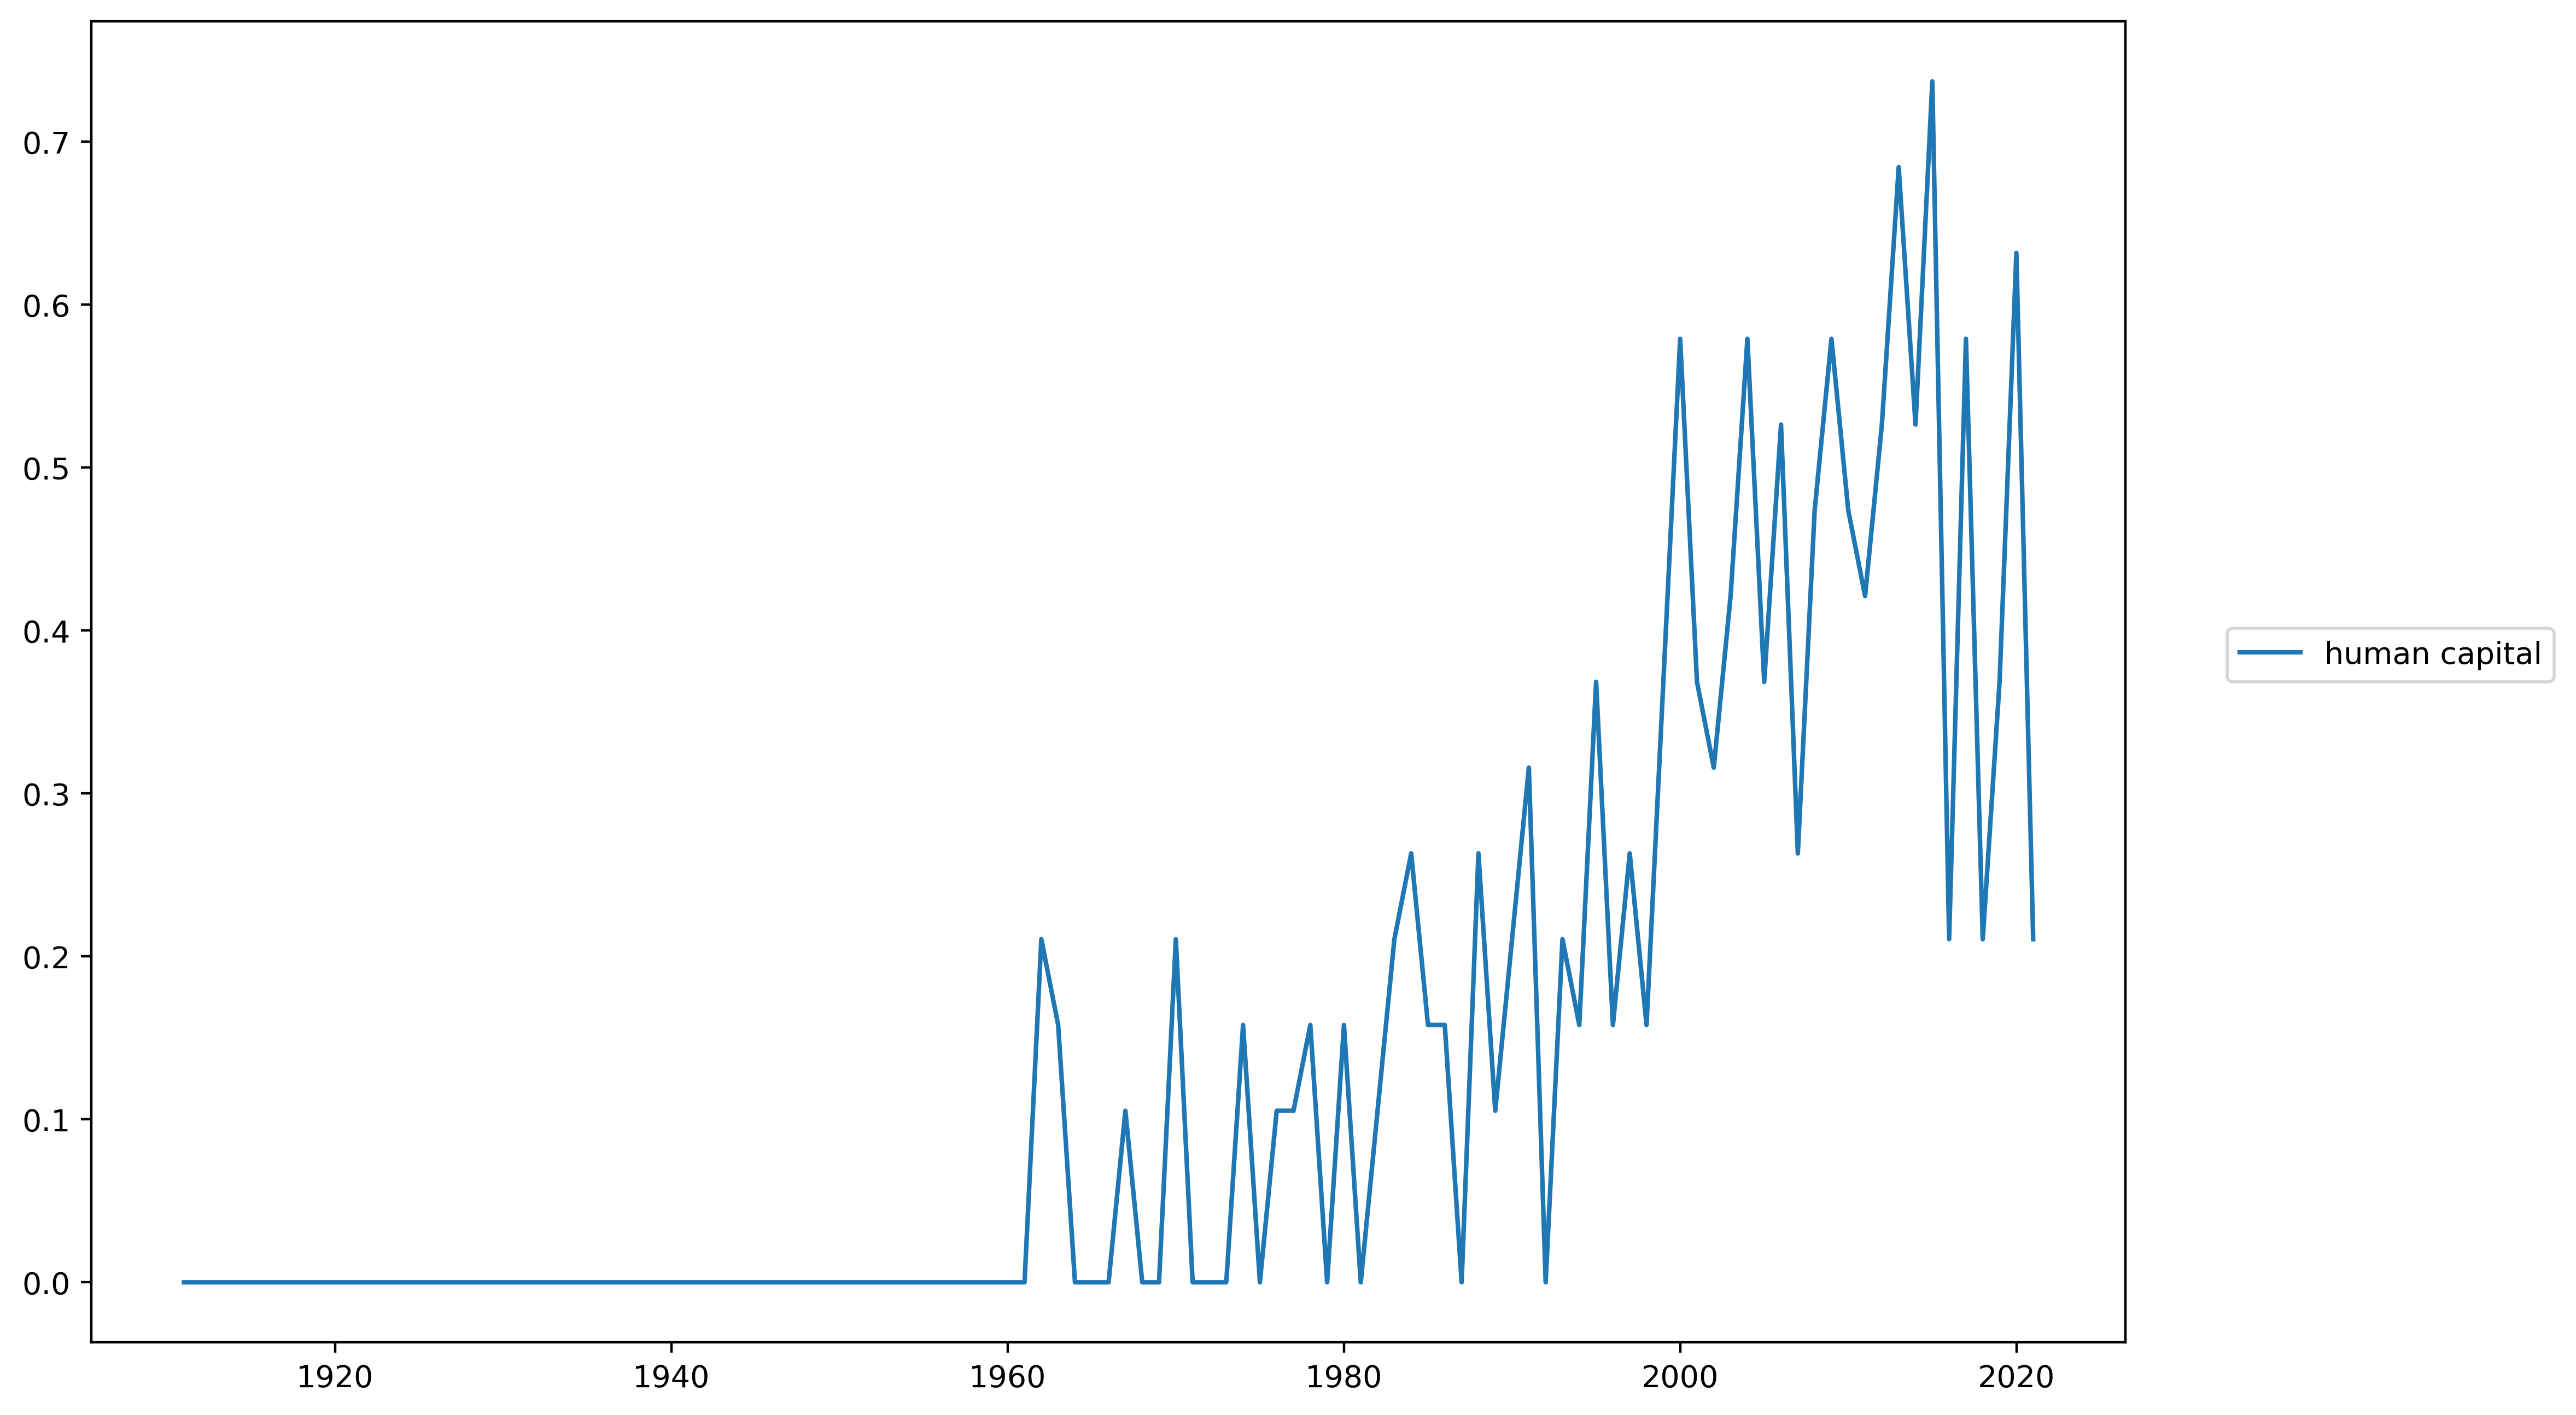

In [49]:
plt.figure(figsize=(12,8), dpi=400)
plt.plot(df_centrality_time_series['year'],df_centrality_time_series['human capital'], label = "human capital")
plt.legend(loc=(1.05,0.5))

In [44]:
df.to_csv('development_cleaned.csv')